Decrease and Conquer

Insertion Sort<br>
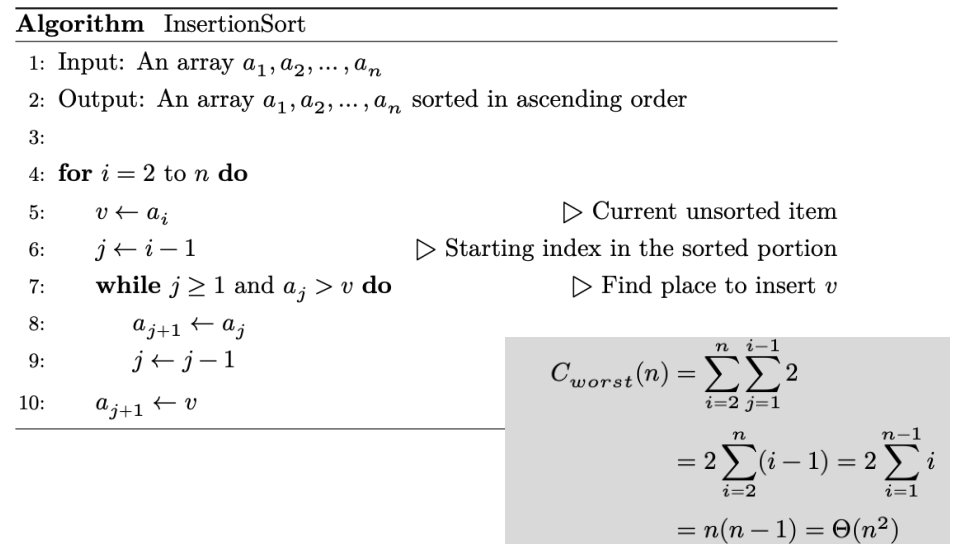

In [181]:
def insertionSort(A):
    for i in range(1, len(A)):
        v = A[i]
        j = i - 1
        while j >=0 and A[j] > v:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = v
    return A

In [182]:
insertionSort([5,2,4,6,1,3])

[1, 2, 3, 4, 5, 6]

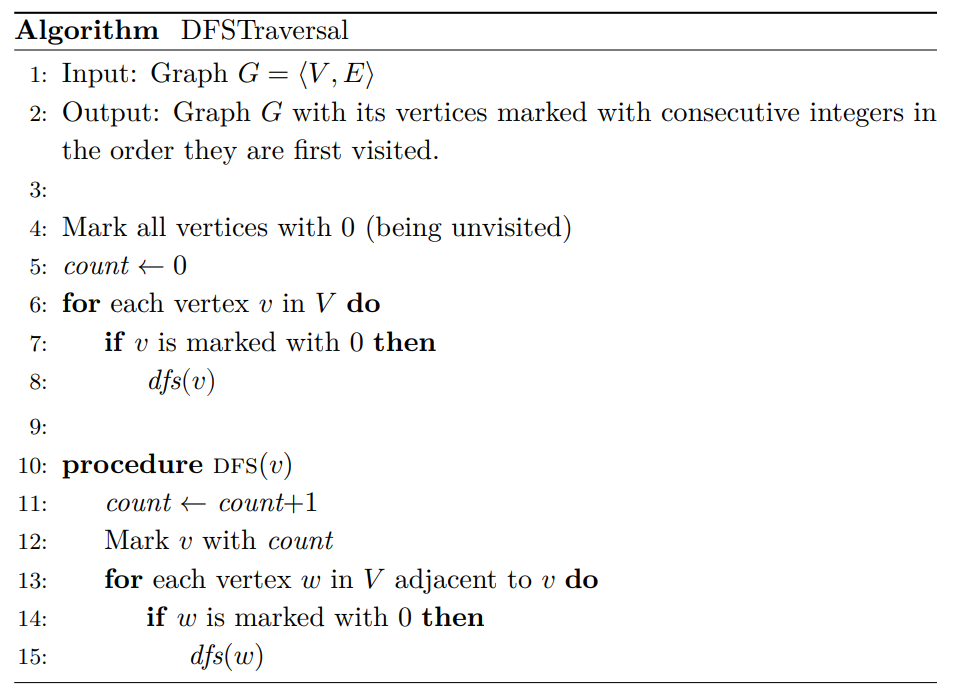

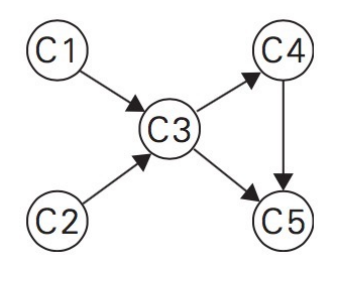

In [183]:
from KINGofLibrary import Graph
g = Graph(maxVertices=5, directed=True)
c1 = g.insert_vertex('C1')
c2 = g.insert_vertex('C2')
c3 = g.insert_vertex('C3')
c4 = g.insert_vertex('C4')
c5 = g.insert_vertex('C5')

g.insert_edge(c1, c3, 1)
g.insert_edge(c2, c3, 1)
g.insert_edge(c3, c4, 1)
g.insert_edge(c3, c5, 1)
g.insert_edge(c4, c5, 1)

def dfs_traversal(graph):
    marks = {}      
    global count
    count = 0        
    all_vertices = sorted(graph.vertices(), key=lambda x: x.element())
    for v in all_vertices:
        marks[v] = 0

    def dfs(u):
        global count
        count += 1             
        marks[u] = count       
        print(f"Node {u.element()} -> Marked: {count}")
        edges = graph.incident_edges(u)
        neighbors = [e.opposite(u) for e in edges]
        neighbors.sort(key=lambda x: x.element())
        for w in neighbors:
            if marks[w] == 0:
                dfs(w)

    print("--- mark ---")
    for v in all_vertices:
        if marks[v] == 0:
            dfs(v)

    return marks

result_marks = dfs_traversal(g)

print("--- result ---")

for v in sorted(result_marks.keys(), key=lambda x: x.element()):
    print(f"{v.element()}: {result_marks[v]}")

--- mark ---
Node C1 -> Marked: 1
Node C3 -> Marked: 2
Node C4 -> Marked: 3
Node C5 -> Marked: 4
Node C2 -> Marked: 5
--- result ---
C1: 1
C2: 5
C3: 2
C4: 3
C5: 4


ใช้ library จาก CPE112 ทำกราฟและปรับใช้กับตัวpsuedo codeที่ให้มา

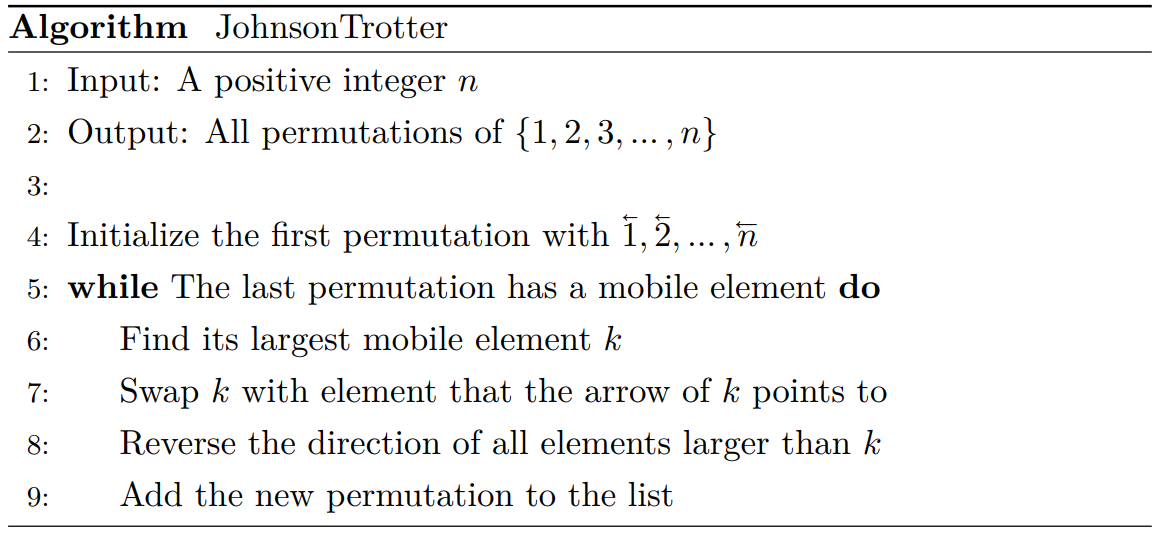

In [184]:
LEFT = 0
RIGHT = 1

def get_largest_mobile(n, p, directions):
    """ฟังก์ชันหาค่า Mobile Integer ที่มากที่สุด"""
    mobile_val = 0
    mobile_idx = -1

    for i in range(n):
        val = p[i]
        direction = directions[i]
        
        # เช็กว่าเป็น Mobile หรือไม่? (ชี้ไปหาตัวที่น้อยกว่า)
        is_mobile = False
        if direction == LEFT: # หันซ้าย
            if i > 0 and val > p[i-1]: # ไม่ติดขอบซ้าย และ มากกว่าตัวซ้าย
                is_mobile = True
        else: # หันขวา
            if i < n - 1 and val > p[i+1]: # ไม่ติดขอบขวา และ มากกว่าตัวขวา
                is_mobile = True

        # ถ้าเป็น Mobile และค่ามากกว่าตัวที่เคยเจอมา ให้จำไว้
        if is_mobile and val > mobile_val:
            mobile_val = val
            mobile_idx = i
            
    return mobile_val, mobile_idx

def johnson_trotter(n):
    """ฟังก์ชันหลักสำหรับสร้างและแสดง Permutation"""
    
    # 1. สร้างค่าเริ่มต้น
    p = list(range(1, n + 1))    # [1, 2, ..., n]
    directions = [LEFT] * n      # [0, 0, ..., 0] เริ่มต้นหันซ้ายหมด
    
    # แสดง Permutation แรกสุด
    print(f"{p}")
    
    # 2. วนลูปตราบเท่าที่ยังหา Mobile Element เจอ
    while True:
        k, k_idx = get_largest_mobile(n, p, directions)
        
        # ถ้า k = 0 แปลว่าไม่มี Mobile Element แล้ว -> จบการทำงาน
        if k == 0:
            break
            
        # 3. สลับที่ k กับตัวที่มันหันหน้าไปหา
        direction = directions[k_idx]
        if direction == LEFT:
            swap_idx = k_idx - 1
        else:
            swap_idx = k_idx + 1
            
        # สลับตัวเลขใน p
        p[k_idx], p[swap_idx] = p[swap_idx], p[k_idx]
        # สลับทิศทางใน directions ติดไปด้วย
        directions[k_idx], directions[swap_idx] = directions[swap_idx], directions[k_idx]
        
        # 4. กลับทิศลูกศรของทุกตัวที่ "มากกว่า k"
        for i in range(n):
            if p[i] > k:
                directions[i] = 1 - directions[i] # เปลี่ยน 0->1, 1->0
        
        # แสดงผลลัพธ์รอบนี้
        print(f"{p}")

In [185]:
johnson_trotter(4)

[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 4, 2, 3]
[4, 1, 2, 3]
[4, 1, 3, 2]
[1, 4, 3, 2]
[1, 3, 4, 2]
[1, 3, 2, 4]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 4, 1, 2]
[4, 3, 1, 2]
[4, 3, 2, 1]
[3, 4, 2, 1]
[3, 2, 4, 1]
[3, 2, 1, 4]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 3, 1]
[4, 2, 3, 1]
[4, 2, 1, 3]
[2, 4, 1, 3]
[2, 1, 4, 3]
[2, 1, 3, 4]


ใช้ AI geminiและ code จาก <a href="https://www.geeksforgeeks.org/dsa/johnson-trotter-algorithm/"> geeksforgeeks</a> และ pseudo codeที่ให้มาปรับใช้เข้าด้วยกัน

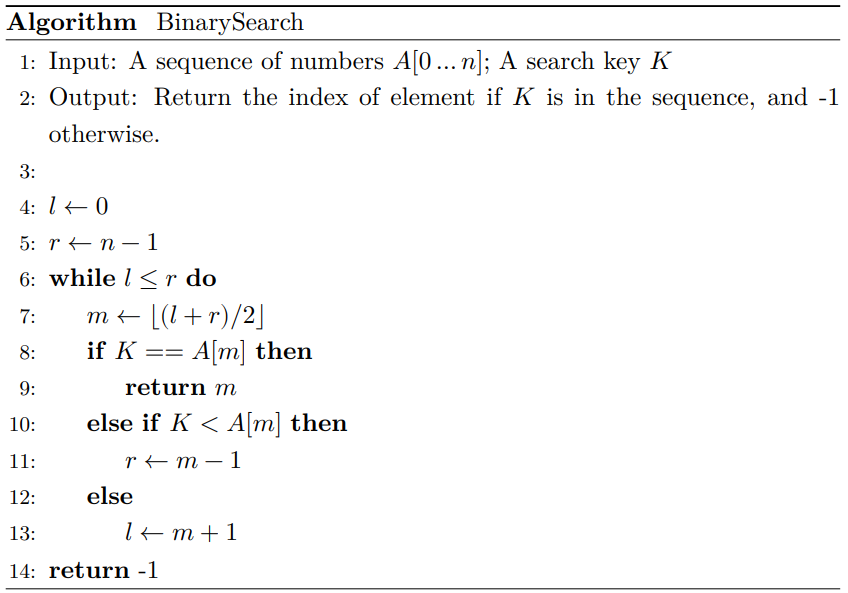

In [186]:
def binary_search(A, key):
    l=0
    r=len(A)-1
    
    while l <= r:
        m = (l + r) // 2
        if A[m] == key:
            return m
        elif A[m] < key:
            l = m + 1
        else:
            r = m - 1

    return -1

In [187]:
binary_search([6,5,1,8,3], 1)

2

Assignment 1: Russian Peasant Multiplication

In [188]:
def russian_peasant(a, b):
    result = 0
    while a > 0:
        if a % 2 != 0:
            result += b
        a //= 2
        b *= 2
        print(f"a: {a}, b: {b}, result: {result}")
    return result

In [189]:
russian_peasant(13, 18)

a: 6, b: 36, result: 18
a: 3, b: 72, result: 18
a: 1, b: 144, result: 90
a: 0, b: 288, result: 234


234

จากคลิป
https://youtube.com/shorts/C0nRML1lw74?si=kJB0M67vviEdSP8f
เราสนใจแค่ผลลัพธ์ของการหารเลขคี่

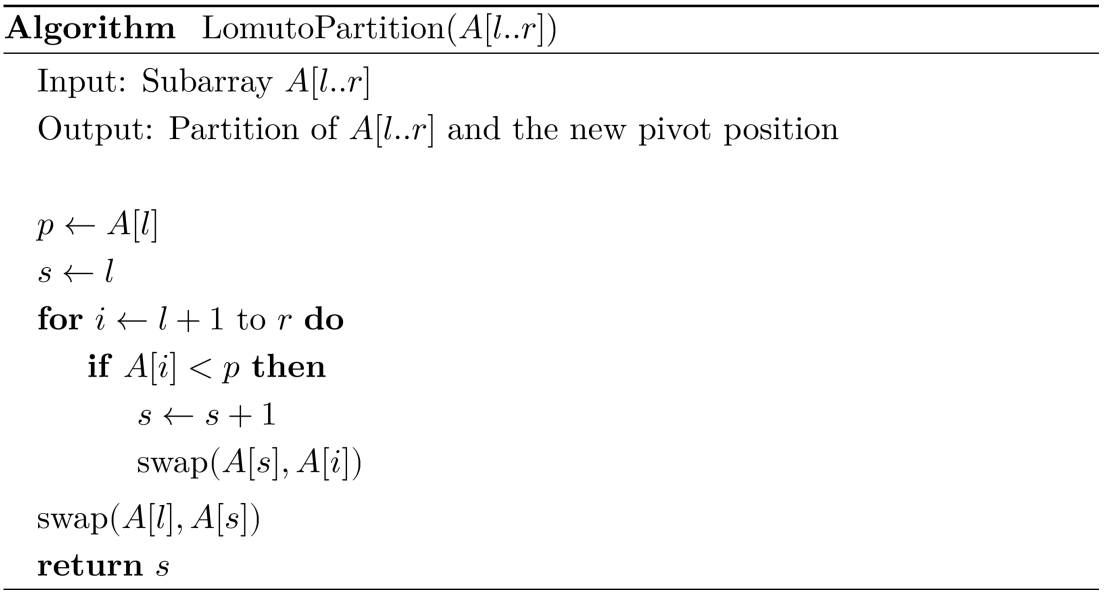

In [190]:
def Lomuto_partition(A, l, r):
    p = A[l]
    s=l
    for i in range(l + 1, r + 1):
        if A[i] < p:
            s += 1
            A[i], A[s] = A[s], A[i]
    A[l], A[s] = A[s], A[l]
    return s

In [191]:
Lomuto_partition([9,3,7,6,2,8,5,1,4], 0, 8)

8

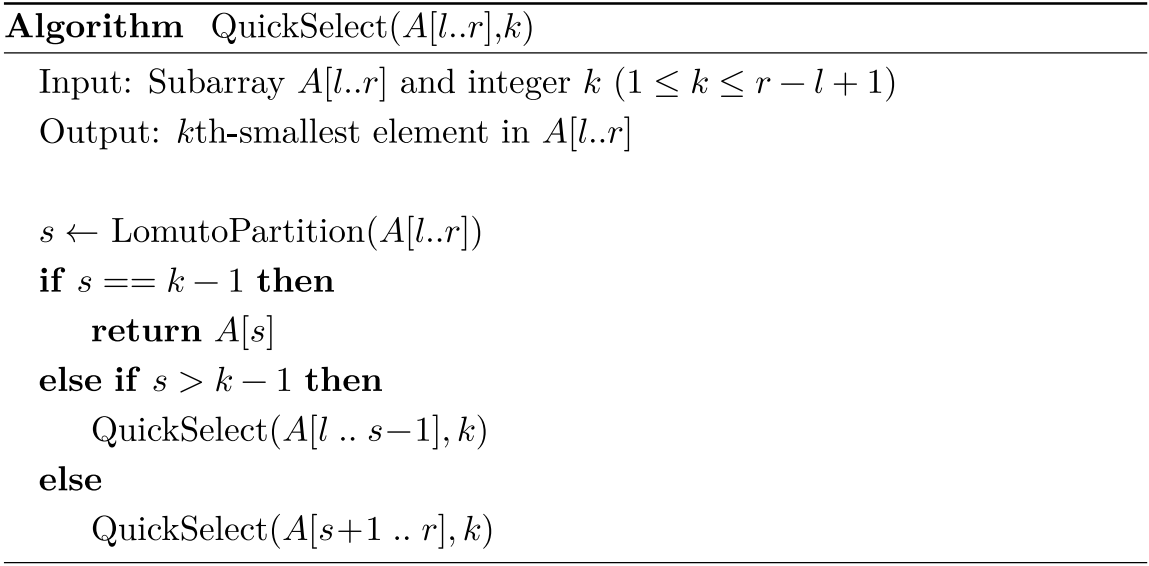

In [192]:
def QuickSelect(A, l, r, k):
    s = Lomuto_partition(A, l, r)
    if s == k-1:
        return A[s]
    elif s>k-1:
        return QuickSelect(A, l, s - 1, k)
    else:
        return QuickSelect(A, s + 1, r, k)

In [193]:
QuickSelect([4,1,10,8,7,12,9,2,15],0,8,5)

8

Assignment 2: Interpolation Search

In [194]:
def interpolationSearch(arr, n, x): 
    low = 0
    high = (n - 1) 
    while low <= high and x >= arr[low] and x <= arr[high]: 
        if low == high: 
            if arr[low] == x: 
                return low; 
            return -1; 
        pos = int(low + (((float(high - low)/( arr[high] - arr[low])) * (x - arr[low])))) 
        if arr[pos] == x: 
            return pos 
        if arr[pos] < x: 
            low = pos + 1; 
        else: 
            high = pos - 1; 
    return -1


In [195]:
interpolationSearch([10, 12, 13, 16, 18, 19, 20, 21,22, 23, 24, 33, 35, 42, 47], 15,18)

4

codeจาก<a href="https://youtu.be/YSVS5GG1JuI?si=5sC5Dl-i4KZl8u9_">youtube</a>และ
<a href="https://www.geeksforgeeks.org/dsa/interpolation-search/">geeksforgeeks</a>